# Stirred (not shaken)

**MOD510 - Project 3 G05**   
- Parthasarathi Jena
- Jing Hou
- Hodjdat Moradi  

Date: Nov.5.2023

### Abstract :(is it accurate and informative)


In [4]:
# load libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib


### Abstract : 


### Introduction : (status of problem and major objectives)



## Learning objectives. 

By completing this project, the student will:
- Implement an ODE solver using the Euler, Runge-Kutta (second and fourth order) algorithm
- Use mixing tank models to model how the shape of a medical tracer changes after traveling in an aorta arch
- Compare the ODE model to CFD simulation results and extract information about the cardiac output (flooding rate) and volume of the aortic
arch
- Investigate if one can use the tracer signal to identify if there is a an aneurysm in the aorta

## Theory
The mathematical equations for n-tanks in a series follows from mass conservation 
([change of mass in the system]/time = [mass in]/time - [mass out]/time)

\begin{align}
    V_0\frac{dC_0}{dt} = q(C_{in}-C_0) \\
    V_1\frac{dC_1}{dt} = q(C_0-C_1) \\
   \\ \vdots\\
    V_{n-1}\frac{dC_{n-1}}{dt} = q(C_{n-2}-C_{n-1})
\end{align}

In the above set of ODEs, $V_i$ is the volume of tank number i, $C_i = C_i(t)$ is the concentration in the tank at time t (unit mass/volume), $q$ is a constant volumetric injection flow rate (cardiac output and unit volume/time), and $C_{in} = C_{in}(t)$ is the injected concentration at time t.

Scaling of volumes.
In this project, we want to use n as a parameter without changing the total volume of the system, thus we want the $n = 1$ system to have the same
volume as, e.g., n = 10. We therefore need to scale the volumes of the individual tanks. To simplify, we shall assume that each tank has the same
volume V , hence the total volume is $$V_{Tot} = V_0 + V_1 + · · · + V_{n−1} = nV$$ which leads to $V = V_{Tot}/n$.


We can now rewrite the mass conservation equations as

\begin{align}
    \frac{dC_0}{dt} = \frac {n(C_{in}-C_0)}{\tau} \\
    \frac{dC_1}{dt} = \frac {n(C_0-C_1)}{\tau}  \\

   \\ \vdots\\
    \frac{dC_{n-1}}{dt} = \frac {(C_{n-2}-C_{n-1})}{\tau}
\end{align}

where $\tau \equiv V_{Tot}/q$. Note that $\tau$ has units of time. To help in later exercises, the **analytical solution** for $n = 1, 2, 3$ in a special case is given below

\begin{align}
    C_0(t) =  \exp\left(-\frac{t}{\tau}\right)\\
    C_1(t) = \frac{2t}{\tau}\exp\left(-\frac{2t}{\tau}\right) \\
    C_2(t) = \frac{9t^2}{2\tau^2}\exp\left(-\frac{3t}{\tau}\right)
\end{align}


## Exercise 1: Write your own ODE solver

**Part 1**. Implement an ODE solver, that solves an arbitrary (initial value) system of ODEs of the form

$$ \frac {d\vec{y}}{dt} =  \vec{f}(\vec{y}, t) $$

where the solution $\vec{y}$ may be a vector. Since the equation system is completely generic, the solver has to take in as argument the function that computes the right hand side-vector; that is, you are not allowed to hard-code in a specific model. In addition, the solver needs to know the starting time, $t0$, the corresponding initial condition(s)$\vec{f}(\vec{y}, t)$, as well as the final simulation time, $t_f$. The user should be able to choose between the following methods:

1. Eulers method
2. Runge-Kutta second order (RK2)
3. Runge-Kutta fourth order (RK4)


$$
\frac {d}{dt}
\begin{pmatrix}
C_0\\ C_1\\ 
\vdots\\ 
C_{n-1}
\end{pmatrix}
=

\begin{pmatrix}
{f_1}(\vec{C}, t)\\
{f_2}(\vec{C}, t)\\
\vdots\\
{f_n}(\vec{C}, t)\\
\end{pmatrix}
$$



1. Eulers method:

$$  y_{n+1}= {y_{t}} +  f(y, t)\Delta t + \frac{1}{2!} y''(t)\Delta t^2 $$
$$  y_{n+1}= {y_{t}} +  f(y, t)\Delta t $$


2. Runge-Kutta second order (RK2)

$$k_1 = \Delta t \cdot f(y_n,t_n)$$
$$k_2 = \Delta t \cdot f(y_n + \frac {k_1}{2}, t_n + \frac {\Delta t}{2})$$
$$y_{n+1} = y_n + k_2 $$


3. Runge-Kutta fourth order (RK4)

$$k_1 = \Delta t \cdot f(y_n,t_n)$$
$$k_2 = \Delta t \cdot f(y_n + \frac {k_1}{2}, t_n + \frac {\Delta t}{2})$$
$$k_3 = \Delta t \cdot f(y_n + \frac {k_2}{2}, t_n + \frac {\Delta t}{2})$$
$$k_4 = \Delta t \cdot f(y_n + {k_3}, t_n + \Delta t )$$
$$y_{n+1} = y_n + \frac {1}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$


In [21]:
class ODE_Solver():
    '''this class includes general ODE solver by Euler's method, RK-2 or RK-4.
    input parameters:
        f  : concentration function dc/dt = f(c,t)
        t0 : initial time
        t  : time series
        tf : final time
        c0 : initial concentration
        dt : time step'''
    
    def __init__(self, t0, t, c, dt, tf):
        self.t_ = t
        self.t0_ = t0
        self.tf_ = tf
        self.c0_ = c
        self.dt_ = dt   
    
    def euler(self,y,t,*args,**kwargs):
        '''Euler method '''
        euler_step = self.f(y,t)*self.dt
        return euler_step
        
    def rk2(self,y,t,*args,**kwargs):
        '''Second-order Runge-Kutta method'''
        k1= self.dt* self.f(y,t,*args,**kwargs)
        k2= self.dt* self.f(y+k1/2, t + self.dt/2,*args,**kwargs)
        return k2

    def rk4(self,y,t,*args,**kwargs):
        '''Fourth-order Runge-Kutta method'''
        k1= self.dt* self.f(y,t,*args,**kwargs)
        k2= self.dt* self.f(y+k1/2,t+ self.dt/2,*args,**kwargs)
        k3= self.dt* self.f(y+k2/2,t+ self.dt/2,*args,**kwargs)
        k4= self.dt* self.f(y+k3,t+ self.dt,*args,**kwargs)
        return (k1+2*k2+2*k3+k4)/6
    
    def f_tanks(self,c,t,tau=2):
        n=len(c)
        c_inj=0
        rhs=[]
        for i in range(n):
            if i==0:
                rhs.append(c_inj-c[0])
            else:
                rhs.append(c[i-1]-c[i])
        return np.array(rhs)*n/tau
    
    def ode_solver(self,method='euler',*args,**kwargs):
        c =[]
        t= []
        c.append(self.c0_)
        t.append(self.t0_)
        ti= self.t0_
        while(ti<= self.tf_):
            ti= ti+ self.dt_
            if method == 'euler':
                step= self.dt_ * self.f_(c[-1],ti,*args,**kwargs)
            if method == 'rk2':
                step= self.rk2(self.f_,c[-1],ti,self.dt_,*args,**kwargs)
            if method == 'rk4':
                step= self.rk4(self.f_,c[-1],ti,self.dt_,*args,**kwargs)
            c.append(c[-1]+step)
            t.append(ti)
        return np.array(t),np.array(c)
    
    def analytical_tanks(self, t,no_tanks,tau=2):
        ''' analytical solutions to the solver where n = 1,2,3 '''
        x=t/tau
        if no_tanks==1:
            return np.exp(-x)
        elif no_tanks==2:
            return 2*x*np.exp(-2*x)
        elif no_tanks==3:
            return 9/2*x**2*np.exp(-3*x)
    
    def simulate(self):
        methods = ['euler','rk2','rk4']
        tf=10
        t=np.linspace(0,tf,1000)
        tau=2
        no_tanks=3
        c0=np.zeros(no_tanks)
        c0[0]=1
        for method in methods:
            tn,cn=self.ode_solver(self.f_tanks,c0=c0,t0=0,tf=tf,dt=.01,method=method,tau=tau)
            plt.plot(tn,cn[:,-1],'*',label=method)
        plt.plot(t,self.analytical_tanks(t,no_tanks=no_tanks,tau=tau),label='analytical')
        plt.grid()
        plt.legend()

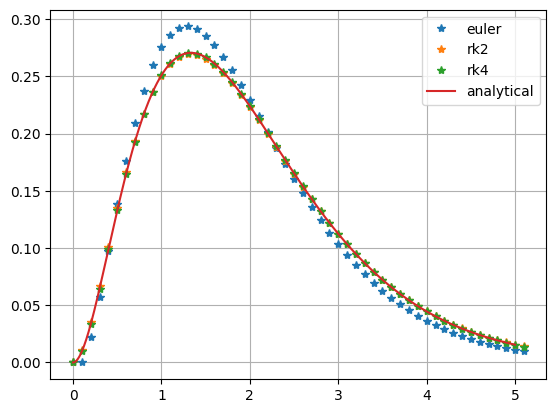

In [28]:
def rk2(f,y,t,dt,*args,**kwargs):
    k1=dt*f(y,t,*args,**kwargs)
    k2=dt*f(y+k1/2,t+dt/2,*args,**kwargs)
    return k2

def rk4(f,y,t,dt,*args,**kwargs):
    k1=dt*f(y,t,*args,**kwargs)
    k2=dt*f(y+k1/2,t+dt/2,*args,**kwargs)
    k3=dt*f(y+k2/2,t+dt/2,*args,**kwargs)
    k4=dt*f(y+k3,t+dt,*args,**kwargs)
    return (k1+2*k2+2*k3+k4)/6

def ode_solver(f,c0,t0,tf,dt,method,*args,**kwargs):
    c=[]
    t=[]
    c.append(c0)
    t.append(t0)
    ti=t0
    while(ti<=tf):
        ti=ti+dt
        if method == 'euler':
            step=dt*f(c[-1],ti,*args,**kwargs)
        elif method == 'rk2':
            step=rk2(f,c[-1],ti,dt,*args,**kwargs)
        elif method == 'rk4':
            step= rk4(f,c[-1],ti,dt,*args,**kwargs)
        c.append(c[-1]+step)
        t.append(ti)
    return np.array(t),np.array(c)

def f_tanks(c,t,tau=2):
    n=len(c)
    c_inj=0
    rhs=[]
    for i in range(n):
        if i==0:
            rhs.append(c_inj-c[0])
        else:
            rhs.append(c[i-1]-c[i])
    return np.array(rhs)*n/tau

def analytical_tanks(t,no_tanks,tau=2):
    x=t/tau
    if no_tanks==1:
        return np.exp(-x)
    elif no_tanks==2:
        return 2*x*np.exp(-2*x)
    elif no_tanks==3:
        return 9/2*x**2*np.exp(-3*x)

methods = ['euler','rk2','rk4']
tf=5
t=np.linspace(0,tf,1000)
tau=2
no_tanks=3
c0=np.zeros(no_tanks)
c0[0]=1
for method in methods:
    tn,cn=ode_solver(f_tanks,c0=c0,t0=0,tf=tf,dt=.1,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical_tanks(t,no_tanks=no_tanks,tau=tau),label='analytical')
plt.grid()
plt.legend()



**Part 2**.
1. Test you implementation against the analytical solutions in equation (3)
for $n = 1, 2 and 3$.
- for $n = 1$ use $\tau = 2, C_0(0) = 1$
- for $n = 2$ use $\tau = 2, C_0(0) = 1, C_1(0) = 0$
- for $n = 3$ use $\tau = 2, C_0(0) = 1, C_1(0) = C_2(0) = 0$

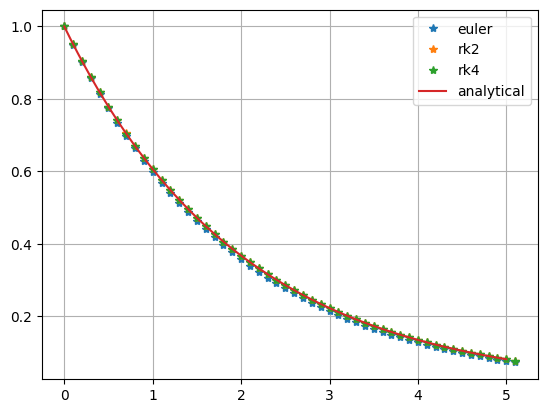

In [37]:
# N =1

methods = ['euler','rk2','rk4']
tf=5
t=np.linspace(0,tf,1000)
tau=2
no_tanks=1
c0=np.zeros(no_tanks)
c0[0]=1
for method in methods:
    tn,cn=ode_solver(f_tanks,c0=c0,t0=0,tf=tf,dt=.1,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical_tanks(t,no_tanks=no_tanks,tau=tau),label='analytical')
plt.grid()
plt.legend()

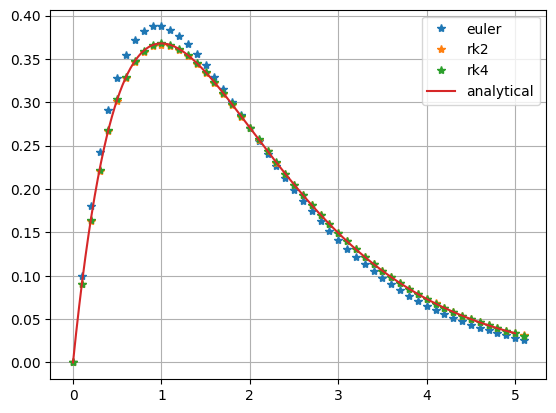

In [42]:
# N = 2


tau=2
no_tanks=2
for method in methods:
    tn,cn=ode_solver(f_tanks,c0=c0,t0=0,tf=tf,dt=.1,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical_tanks(t,no_tanks=no_tanks,tau=tau),label='analytical')
plt.grid()
plt.legend()

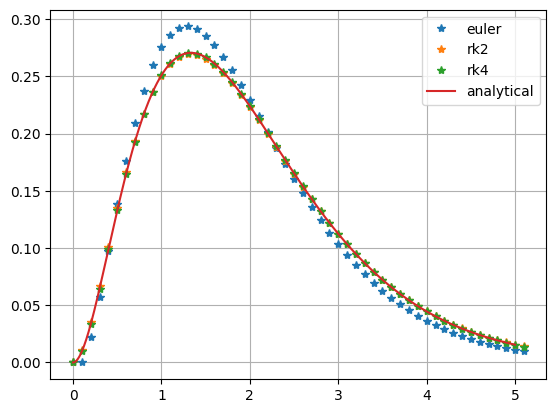

In [47]:

tau=2
no_tanks=3

c0=np.zeros(no_tanks)
c0[0]=1

for method in methods:
    tn,cn=ode_solver(f_tanks,c0=c0,t0=0,tf=tf,dt=.1,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical_tanks(t,no_tanks=3,tau=tau),label='analytical')
plt.grid()
plt.legend()


**Part 3**.
 Pick $n =1, 2, or 3 $
 
1. plot the numerical error at t = 1, for the last tank, and for dt values in
the range $0.1, . . . 0.001$. (You may try lower values if you have a very fast
solver)
2. does the numerical error scale as expected for Euler, RK2, and RK4?

When t = 1, the error rate of Euler, RK2 and RK4 becomes larger as the tank number N increase, clearly with the higher slope when the mixing tank number increase.  Among all, it is obvious that RK4 is the most accurate method and the Euler has the least accuracy. This observed result may also explained by stiff set of ODE (book) as ODE system becomes more stiff, the method becomes more constraint. 

### Exercise 2: Fit CSTR model to CFD model: Healthy aorta

Steward-Hamilton equation [6]:

$$ q = \frac{M_{inj}}{\int_{0}^{\infty}C_{out}(t)dt}$$



**Part 1**.
1. Use $M_{inj}$ = 83.333 gram, equation (7) and the data in Healthy_rect_1s.csv
to show that q = 5 L/min.

only the injected mass tracer $M_{inj}$ is known. For the CFD simulations, $M_{inj} = 83.33$ grams is used. By knowing the mass of the injected tracer, and the outlet concentration, then we can calculate the volumetric injection flow rate $q$.

In [100]:
healthy_rect_data = pd.read_csv('data/Healthy_rect_1s.csv')
time = healthy_rect_data.Time # in second
concentration = healthy_rect_data.Concentration

In [105]:
M_inj = 83.333 #gram
C_out = np.trapz(concentration, time)
q = M_inj/C_out  # ml/s
q = q*1e-3*60    # l/min

print(f'Flow rate from healthy heart data: {q:0.2f} L/min')

Flow rate from healthy heart data: 5.01 L/min


**Part 2**. Make Python functions that reproduces at least three other injection protocol than rect_1s (i.e. minimum four in total) from figure 5, as an
inspiration you can use the code below for the rect_1s

In [107]:
class CSTRModel(ODEsolvers):
    '''
    This class makes a Continuous-Stirred-Tank-Reactor model 
    and provides methods to perform time domain simulations on it 
    '''
    def __init__(self, tau=2, N=1, dt=3, Tmax=20, y_init='first',inj_prot=None):
        '''
        params:  make sure all the units are consistent
            tau : V/q time taken to replace the whole volume of the tank
            N : number of subtanks the whole volume is divided into.
            dt: time diff between each simulation step
            Tmax  : max simulation time 
            y_init : initial concentration of tracer in each spatial grid
                   : takes values {'first', 'empty', list }
                   : 'first' - case where first (0th) cell has a tracer conc
                   : 'empty' - case where the whole volume has 0 tracer conc
                   : list: list of tracer conc in each of the grid cell
            inj_protocol: injection protocol to use 
                   : takes values {'rect_1s', 'rect_2s', 'rect_3s', 
                                   'ramp_1s', 'ramp_2s', 'biphasic'}

        '''
        
        # set and initialize temporal parameters 
        self.dt = dt
        self.Tmax = Tmax
        self.Nt = int(Tmax/dt)  # number of grid elements on the time axis
        deltaTs = np.ones(self.Nt)*dt
        #time stamp after each time step
        ts = np.cumsum(deltaTs)# [sum(self.deltaTs[:i+1])for i in range(len(self.deltaTs))] 
        self.ts = ts# np.append(0,ts)
        
        # set and initialize spatial parameters 
        # set initial condition of concs before sim starts
        self.N = int(N)  #number of mixing tanks in series
        match y_init:    
            case 'first':
                y_init = np.zeros(self.N)
                y_init[0] = 1     # set the tracer concentration in first mixing tank to 1
                                  # every conc in all other tanks is 0
            case 'empty':
                y_init = np.zeros(int(self.N)) # there are no trancer conc anywhere else
            case other:
                y_init = y_init   # set the initial concentrations of tanks if its provided. 

        
        
        #initiate ODEsolver
        ODEsolvers.__init__(self, y_init=y_init,deltaTs=deltaTs, slope_func=self.cstr)
        
        # injection protocol. cinj stores the concentration of injection 
        # create a list of concs being injected at each time step
        self.make_injection_protocol(inj_prot)
        
        #print(self.ts,self.cinj)
        
        # store model parameters
        self.tau = tau   # physical model parameter
        self.nparams = {'tau': tau, 'N':N }

    def make_injection_protocol(self, protocol):
        match protocol:
            case 'rect_1s':
                self.inj_t = [0,1.,1.,2.,3.]
                self.inj_c = [1, 1, 0, 0, 0]
            case 'rect_2s':
                self.inj_t = [0,2.,2.,3.,4.]
                self.inj_c = [1, 1, 0, 0, 0]
            case 'rect_3s':
                self.inj_t = [0,3.,3.,4.,5.]
                self.inj_c = [1, 1, 0, 0, 0]
            case 'ramp_1s':
                self.inj_t = [0,1.,1.,2.,5.]
                self.inj_c = [0, 1, 0, 0, 0]
            case 'ramp_2s':
                self.inj_t = [0,2.,2.,3.,5.]
                self.inj_c = [0, 1, 0, 0, 0]
            case 'biphasic':
                self.inj_t = [  0,1.0,1.,2.,2.,3.,3.,4.]
                self.inj_c = [0.7,0.7,0., 0, 1,1,0,0]
            case None:
                self.inj_t = [0,1.]
                self.inj_c = [0, 0]
                
    def cinj(self, t):
        return(np.interp(t,self.inj_t, self.inj_c))

    def cstr(self, conc, ti, tau=2, N=1):
        '''
        this function provides the time derivative for the concentration 
        in a mixing tank at ti.
        CSTR time differencial
        f = d/dt(concentration) = slope = n/tau*(delta concentration)
            delta concentration in the equation above is the difference between 
            concentration in the nth tank and n-1th tank     
        input:
                conc : a numpy list of concentrat in n number of nodes at time step ti
                ti   : time at which the slope is being derived (note: in this model ti is not used)
                n    : number of tanks in series
                tau  : some parameter of the mixing tank (units = time)
                cinj : the concentration of the fluid being injected into the 0th mixing tank
                       at the ith time step.
        '''
        #print(ti, ts)
        Cinj_t = self.cinj(ti) # injection concentration at ti
        c = np.append(Cinj_t, conc)  # we append the injection
        slope = N/tau*(c[:-1]-c[1:])
        return(slope)

    def analytical(self, c0=1):
        ts = self.ts
        tau = self.tau
        match self.N:
            case 1:
                return c0*np.exp(-ts/tau)
            case 2:
                return 2*c0*ts/tau*np.exp(-2*ts/tau)
            case 3:
                return c0*9*ts*ts/2/tau/tau*np.exp(-3*ts/tau)
            case other:
                print('Not implemented')
                return(None)

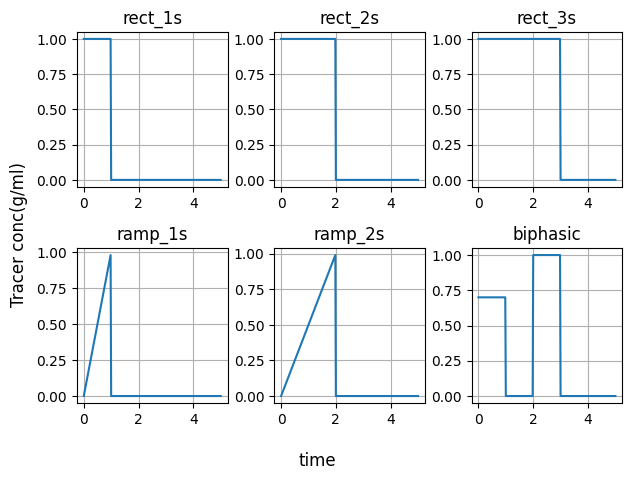

In [109]:
protocols = ['rect_1s', 'rect_2s', 'rect_3s', 'ramp_1s', 'ramp_2s', 'biphasic']
Tmax = time.max()
dt = 0.01
fig, axs = plt.subplots(nrows = 2, ncols = 3)
axs = axs.flatten()
for ax, protocol in zip(axs, protocols):
    model = CSTRModel(dt=dt, Tmax=Tmax, inj_prot=protocol)
    c = model.cinj(time)  # injection concentrations
    ax.plot(time,c)
    ax.grid()
    ax.set_title(protocol)
fig.supylabel('Tracer conc(g/ml)')
fig.supxlabel('time')
plt.tight_layout()

**Part 3**.
- For the 1s rectangular pulse injection protocol, tune $\tau = Vtot/q$ and the number of compartments to match the data for the healthy patient
(Healthy_rect_1s.csv) .
- Make a figure where you show your "best match". Use scatter points for
the data, and solid lines for your simulation.
- "Best match" of VTot can be done by one of the following methods, there
will be an increasing number of points given if you choose the most difficult
method
1. (easy) manually adjust V to match data
2. (moderate) use scipy.optimize.curve_fit to find V
3. (hard) In the course we have covered several algorithms that are useful
for finding roots and/or minima of functions, e.g., fixed point iteration,
Newton’s Raphson’s method, the bisection method, the secant method,
and gradient descent. Implement one of these methods, and use it
to find the $\tau$ -value that minimizes SSR (see Appendix A). Hint:
Depending on the method(s) you choose, you may have to implement
a Python function to calculate the second derivative of C2 with respect
to $\tau$.

In [110]:
healthy_rect_data

,Time,Concentration
0,0.00,0.000000e+00
1,0.02,0.000000e+00
2,0.04,0.000000e+00
3,0.06,0.000000e+00
4,0.08,0.000000e+00
...,...,...
246,4.92,8.620000e-06
247,4.94,4.980000e-06
248,4.96,2.020000e-06
249,4.98,2.510000e-08


------------------------------------
### **Reflections**:





### **Conclusion**: 




### **References**: 
